# Experiment : 04
## *Analyse the impact of optimization and weight initialization techniques such as Xavier initialization, Kaiming Initialization, dropout and regularization techniques and visualize the change in performance.*

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training shape: (50000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

None


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 37ms/step - accuracy: 0.2738 - loss: 2.0412 - val_accuracy: 0.3600 - val_loss: 1.8454
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.3822 - loss: 1.7297 - val_accuracy: 0.3777 - val_loss: 1.7616
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4091 - loss: 1.6498 - val_accuracy: 0.3917 - val_loss: 1.7126
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4298 - loss: 1.5869 - val_accuracy: 0.4406 - val_loss: 1.5819
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4437 - loss: 1.5616 - val_accuracy: 0.4413 - val_loss: 1.5756
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4596 - loss: 1.5190 - val_accuracy: 0.4115 - val_loss: 1.6863
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.4688 - loss: 1.4939 - val_accuracy: 0.4456 - val_loss: 1.6024
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4666 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.2807 - loss: 1.9749 - val_accuracy: 0.3815 - val_loss: 1.7403
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.4012 - loss: 1.6810 - val_accuracy: 0.3960 - val_loss: 1.6815
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4317 - loss: 1.5951 - val_accuracy: 0.4392 - val_loss: 1.5833
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4523 - loss: 1.5367 - val_accuracy: 0.4494 - val_loss: 1.5662
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4679 - loss: 1.4898 - val_accuracy: 0.4492 - val_loss: 1.5429
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4783 - loss: 1.4521 - val_accuracy: 0.4618 - val_loss: 1.5358
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4969 - loss: 1.4195 - val_accuracy: 0.4853 - val_loss: 1.4725
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.4

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.2305 - loss: 2.0793 - val_accuracy: 0.3250 - val_loss: 1.8504
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.3066 - loss: 1.8866 - val_accuracy: 0.3352 - val_loss: 1.8491
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.3268 - loss: 1.8412 - val_accuracy: 0.3408 - val_loss: 1.7853
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.3363 - loss: 1.8016 - val_accuracy: 0.3843 - val_loss: 1.7130
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.3518 - loss: 1.7799 - val_accuracy: 0.3659 - val_loss: 1.7380
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.3609 - loss: 1.7476 - val_accuracy: 0.3928 - val_loss: 1.6851
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.3721 - loss: 1.7249 - val_accuracy: 0.3889 - val_loss: 1.6994
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.3

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 790,282 (3.01 MB)

 Trainable params: 789,770 (3.01 MB)

 Non-trainable params: 512 (2.00 KB)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.3420 - loss: 1.8863 - val_accuracy: 0.3366 - val_loss: 1.9272
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.4537 - loss: 1.5791 - val_accuracy: 0.3881 - val_loss: 1.7543
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.4782 - loss: 1.5058 - val_accuracy: 0.3420 - val_loss: 2.0120
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.4961 - loss: 1.4540 - val_accuracy: 0.3938 - val_loss: 1.7310
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.5145 - loss: 1.4001 - val_accuracy: 0.4187 - val_loss: 1.6679
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.5224 - loss: 1.3794 - val_accuracy: 0.4047 - val_loss: 1.7449
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.5263 - loss: 1.3525 - val_accuracy: 0.4243 - val_loss: 1.6451
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.5351 - loss: 1.31

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.2178 - loss: 5.8980 - val_accuracy: 0.3516 - val_loss: 5.4292
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.3579 - loss: 5.3250 - val_accuracy: 0.3866 - val_loss: 5.1130
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.4042 - loss: 5.0280 - val_accuracy: 0.4261 - val_loss: 4.8726
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.4254 - loss: 4.8203 - val_accuracy: 0.4361 - val_loss: 4.6991
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.4405 - loss: 4.6313 - val_accuracy: 0.4398 - val_loss: 4.5594
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.4609 - loss: 4.4607 - val_accuracy: 0.4520 - val_loss: 4.4188
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.4721 - loss: 4.3053 - val_accuracy: 0.4500 - val_loss: 4.3130
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.4822 - loss: 4.17

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.2411 - loss: 2.2173 - val_accuracy: 0.3649 - val_loss: 1.9295
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.3787 - loss: 1.8785 - val_accuracy: 0.3895 - val_loss: 1.8572
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.4079 - loss: 1.7923 - val_accuracy: 0.4146 - val_loss: 1.8226
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.4322 - loss: 1.7401 - val_accuracy: 0.4468 - val_loss: 1.7201
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4442 - loss: 1.6940 - val_accuracy: 0.4389 - val_loss: 1.7103
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.4585 - loss: 1.6493 - val_accuracy: 0.4340 - val_loss: 1.7121
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.4756 - loss: 1.6040 - val_accuracy: 0.4535 - val_loss: 1.6829
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.4851 - loss: 1.57

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.2424 - loss: 4.0376 - val_accuracy: 0.3626 - val_loss: 3.6785
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.3718 - loss: 3.5987 - val_accuracy: 0.3827 - val_loss: 3.5003
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.4018 - loss: 3.3900 - val_accuracy: 0.4128 - val_loss: 3.2915
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.4220 - loss: 3.2144 - val_accuracy: 0.4388 - val_loss: 3.1103
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.4476 - loss: 3.0518 - val_accuracy: 0.4316 - val_loss: 3.0217
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.4515 - loss: 2.9243 - val_accuracy: 0.4562 - val_loss: 2.8488
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.4648 - loss: 2.7951 - val_accuracy: 0.4528 - val_loss: 2.7751
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.4749 - loss: 2.67

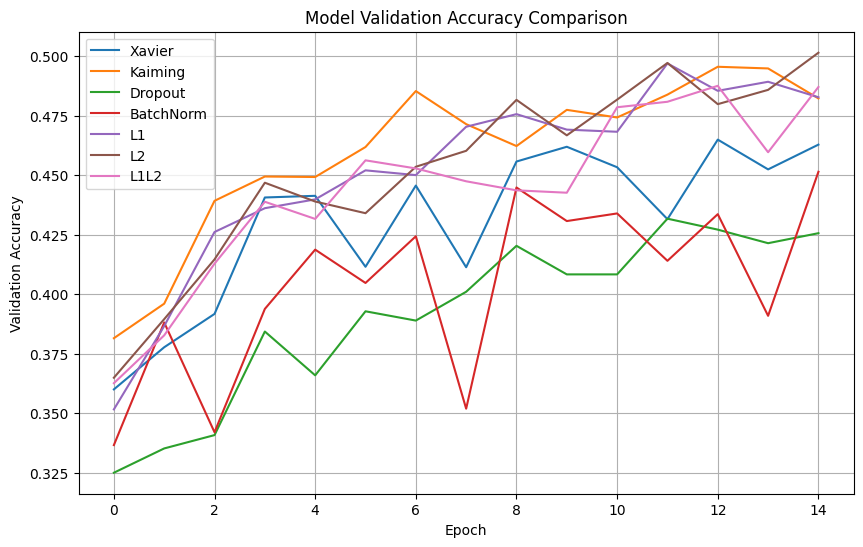

In [1]:
# ----------------------------------- Imports -----------------------------------
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Ensure eager execution
tf.config.run_functions_eagerly(True)

# ----------------------------------- Data Loading -----------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training shape:", X_train.shape)

# ----------------------------------- Models -----------------------------------

# Model 1: Xavier Initialization
model1 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(256, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

# Model 2: Kaiming Initialization
model2 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax', kernel_initializer='he_normal')
])

# Model 3: Dropout Regularization
model3 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model 4: Batch Normalization
model4 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')
])

# Model 5: L1 Regularization
model5 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1(0.0001)),
    layers.Dense(256, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1(0.0001)),
    layers.Dense(128, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1(0.0001)),
    layers.Dense(64, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1(0.0001)),
    layers.Dense(32, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1(0.0001)),
    layers.Dense(10, activation='softmax')
])

# Model 6: L2 Regularization
model6 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(256, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(128, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(64, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(32, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(10, activation='softmax')
])

# Model 7: L1 + L2 Regularization
model7 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1_l2(l1=0.00005, l2=0.00005)),
    layers.Dense(256, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1_l2(l1=0.00005, l2=0.00005)),
    layers.Dense(128, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1_l2(l1=0.00005, l2=0.00005)),
    layers.Dense(64, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1_l2(l1=0.00005, l2=0.00005)),
    layers.Dense(32, activation='relu', kernel_initializer='glorot_normal',
                 kernel_regularizer=regularizers.l1_l2(l1=0.00005, l2=0.00005)),
    layers.Dense(10, activation='softmax')
])

# ----------------------------------- Training Function -----------------------------------
def compile_and_train(model, optimizer, name, batch_size=32, epochs=15):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    score = model.evaluate(X_test, y_test, batch_size=batch_size)
    print(f"{name} Score:", score)
    return history

# ----------------------------------- Optimizers -----------------------------------
histories = {}
histories['Xavier'] = compile_and_train(model1, optimizers.SGD(learning_rate=0.01, momentum=0.9), "Xavier", 32)
histories['Kaiming'] = compile_and_train(model2, optimizers.SGD(learning_rate=0.01, momentum=0.7), "Kaiming", 32)
histories['Dropout'] = compile_and_train(model3, optimizers.SGD(learning_rate=0.01, momentum=0.9), "Dropout", 32)
histories['BatchNorm'] = compile_and_train(model4, optimizers.SGD(learning_rate=0.01, momentum=0.9), "BatchNorm", 128)
histories['L1'] = compile_and_train(model5, optimizers.SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.0), "L1", 128)
histories['L2'] = compile_and_train(model6, optimizers.SGD(learning_rate=0.01, momentum=0.9), "L2", 128)
histories['L1L2'] = compile_and_train(model7, optimizers.SGD(learning_rate=0.01, momentum=0.9), "L1L2", 128)

# ----------------------------------- Plotting -----------------------------------
plt.figure(figsize=(10,6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Model Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()
